In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import math
import requests
from bs4 import BeautifulSoup
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
pd.set_option("display.max_columns",100)

In [2]:
## Proxy settings when using cntlm
http_proxy  = "http://localhost:3128"
https_proxy = "https://localhost:3128"

proxyDict = { 
              "http"  : http_proxy, 
              "https" : https_proxy, 
            }
proxyDict = None

In [3]:
mapping = {
    'Richmond': 'richmond',
    'West Coast': 'westcoast',
    'Sydney': 'swans',
    'Adelaide': 'adelaide',
    'Geelong': 'geelong',
    'Greater Western Sydney': 'gws',
    'Melbourne': 'melbourne',
    'Port Adelaide': 'padelaide',
    'Collingwood': 'collingwood',
    'Hawthorn': 'hawthorn',
    'Essendon': 'essendon',
    'Western Bulldogs': 'bullldogs',
    'St Kilda': 'stkilda',
    'North Melbourne': 'kangaroos',
    'Kangaroos' : 'kangaroos',
    'Fremantle': 'fremantle',
    'Brisbane Lions': 'brisbanel',
    'Gold Coast': 'goldcoast',
    'Carlton': 'carlton'
}
teams = list(mapping.keys())

In [27]:
from data_prep.team_history import History
team_df = History(mapping, proxyDict).generate_team_history()

Richmond 1
Richmond 2
Richmond 3
Richmond 4
Richmond 5
Richmond 6
Richmond 7
Richmond 8
Richmond 9
Richmond 10
Richmond 11
Richmond 12
Richmond 13
Richmond 14
Richmond 15
West Coast 1
West Coast 2
West Coast 3
West Coast 4
West Coast 5
West Coast 6
West Coast 7
West Coast 8
West Coast 9
West Coast 10
West Coast 11
West Coast 12
West Coast 13
West Coast 14
West Coast 15
Sydney 1
Sydney 2
Sydney 3
Sydney 4
Sydney 5
Sydney 6
Sydney 7
Sydney 8
Sydney 9
Sydney 10
Sydney 11
Sydney 12
Sydney 13
Sydney 14
Sydney 15
Adelaide 1
Adelaide 2
Adelaide 3
Adelaide 4
Adelaide 5
Adelaide 6
Adelaide 7
Adelaide 8
Adelaide 9
Adelaide 10
Adelaide 11
Adelaide 12
Adelaide 13
Adelaide 14
Adelaide 15
Geelong 1
Geelong 2
Geelong 3
Geelong 4
Geelong 5
Geelong 6
Geelong 7
Geelong 8
Geelong 9
Geelong 10
Geelong 11
Geelong 12
Geelong 13
Geelong 14
Geelong 15
Greater Western Sydney 1
Greater Western Sydney 2
Greater Western Sydney 3
Greater Western Sydney 4
Greater Western Sydney 5
Greater Western Sydney 6
Greater We

In [10]:
from data_prep.team_history import History
History(mapping, proxyDict).generate_game_data('training-all/', team_df)

2018 Richmond
2018 West Coast
2018 Sydney
2018 Adelaide
2018 Geelong
2018 Greater Western Sydney
2018 Melbourne
2018 Port Adelaide
2018 Collingwood
2018 Hawthorn
2018 Essendon
2018 Western Bulldogs
2018 St Kilda
2018 North Melbourne
2018 Fremantle
2018 Brisbane Lions
2018 Gold Coast
2018 Carlton
2017 Richmond
2017 West Coast
2017 Sydney
2017 Adelaide
2017 Geelong
2017 Greater Western Sydney
2017 Melbourne
2017 Port Adelaide
2017 Collingwood
2017 Hawthorn
2017 Essendon
2017 Western Bulldogs
2017 St Kilda
2017 North Melbourne
2017 Fremantle
2017 Brisbane Lions
2017 Gold Coast
2017 Carlton
2016 Richmond
2016 West Coast
2016 Sydney
2016 Adelaide
2016 Geelong
2016 Greater Western Sydney
2016 Melbourne
2016 Port Adelaide
2016 Collingwood
2016 Hawthorn
2016 Essendon
2016 Western Bulldogs
2016 St Kilda
2016 North Melbourne
2016 Fremantle
2016 Brisbane Lions
2016 Gold Coast
2016 Carlton
2015 Richmond
2015 West Coast
2015 Sydney
2015 Adelaide
2015 Geelong
2015 Greater Western Sydney
2015 Melbour

2004 Brisbane Lions
2004 Carlton


In [236]:
X_list = []
y_list = []

for i in range(1,16):
    X = np.load('training-all/training-'+str(2019-i)+'.npy')

    mask = np.isnan(X).any(axis=1)
    index = np.where(mask==True)[0][0] ## X8 has a row containing nulls
    X = np.delete(X, index, 0)
    X_list.append(X)

    y = np.load('training-all/results-'+str(2019-i)+'.npy')
    y = np.delete(y, index, 0)
    y_list.append(y)
    
X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

print(X.shape)
print(y.shape)

print('Wins vs losses',np.sum(y)/float(len(y)))

(2789, 17)
(2789,)
Wins vs losses 0.5769092864826103


In [237]:
from data_prep.feature_eng import Features
cols = Features().cols()
Features().div_cols(X_list[0]).head()

,Rnd,h_F_mean,h_F_std,h_A_mean,h_A_std,h_M_mean,h_M_std,h_R_mean,h_perc,a_F_mean,a_F_std,a_A_mean,a_A_std,a_M_mean,a_M_std,a_R_mean,a_perc,perc,R_mean,F_mean,A_mean,sqrt_rnd
0,3.0,101.500000,19.500000,106.500000,11.500000,-5.000000,11.500000,0.500000,0.953052,109.500000,8.500000,92.000000,25.000000,17.500000,25.000000,1.000000,1.190217,0.800737,0.500000,0.926941,1.157609,1.732051
1,4.0,101.666667,15.923428,100.666667,12.498889,1.000000,12.498889,0.666667,1.009934,82.666667,7.363574,101.333333,4.189935,-18.666667,4.189935,0.000000,0.815789,1.237983,0.000000,1.229839,0.993421,2.000000
2,7.0,105.000000,12.192894,74.166667,32.121730,30.833333,32.121730,0.833333,1.415730,83.666667,21.898757,82.166667,17.686310,1.500000,17.686310,0.500000,1.018256,1.390349,1.666667,1.254980,0.902637,2.645751
3,10.0,100.555556,13.953185,75.555556,34.944754,25.000000,34.944754,0.777778,1.330882,65.111111,17.329772,93.444444,10.510430,-28.333333,10.510430,0.222222,0.696790,1.910021,3.500000,1.544369,0.808561,3.162278
4,15.0,97.307692,17.397545,72.076923,30.406127,25.230769,30.406127,0.769231,1.350053,88.307692,18.938705,70.230769,14.337438,18.076923,14.337438,0.769231,1.257393,1.073692,1.000000,1.101916,1.026287,3.872983


In [238]:
from modelling.training import Training
scores, best_models = Training(50, 65).train(X_list, y_list)

Season 2018
Bayes CV search took 130.88 seconds for 50 candidates parameter settings.
val. score: 64.71107860984394
test score: 26.037857276207667
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=0.387953735398739,
       colsample_bynode=0.6607528011803191,
       colsample_bytree=0.5531907088993815, gamma=0.0003371512970442934,
       learning_rate=0.025059976791506025, max_delta_step=1, max_depth=3,
       min_child_weight=5, missing=None, n_estimators=219, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.5607335001029943, reg_lambda=0.1740367721237244,
       scale_pos_weight=1.0395011998526054, seed=None, silent=True,
       subsample=0.8888711176321425)

Season 2017
Bayes CV search took 112.57 seconds for 50 candidates parameter settings.
val. score: 62.216484948775125
test score: 13.676815368233187
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=0.87445809119

Season 2007
Bayes CV search took 113.60 seconds for 50 candidates parameter settings.
val. score: 61.43640613774762
test score: 14.614452326188411
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=0.22694479736786846,
       colsample_bynode=0.9539993977361061,
       colsample_bytree=0.21405474916936007, gamma=0.0707371514083337,
       learning_rate=0.002408982781541961, max_delta_step=4, max_depth=4,
       min_child_weight=2, missing=None, n_estimators=817, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1.2906835725333157, reg_lambda=0.8346330208423531,
       scale_pos_weight=1.1491048003305533, seed=None, silent=True,
       subsample=0.5180908994874726)

Interrupting!
Season 2006
Bayes CV search took 48.73 seconds for 50 candidates parameter settings.
val. score: 67.94140732368052
test score: 13.956420099500821
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=0

In [246]:
print(scores)
print("")
print(np.mean(scores))

[26.037857276207667, 13.676815368233187, 42.82167574598584, 21.11967257007582, 19.97723103220232, 34.074885057677754, 35.27261753177018, 38.77271140923635, 14.291105340357847, 21.960856566595194, 23.201026710401788, 14.614452326188411, 13.956420099500821, 15.79589535919759, 18.680407512342327]

23.616908660398206


array([0.02157935, 0.04179631, 0.02542668, 0.04695434, 0.02409647,
       0.06186474, 0.02515591, 0.05058739, 0.05748374, 0.03868612,
       0.02484736, 0.04765238, 0.02597911, 0.05733883, 0.02743275,
       0.04119346, 0.04970197, 0.09897134, 0.07375994, 0.06060245,
       0.07648771, 0.0224016 ], dtype=float32)

In [247]:
from helper_functions.functions import Helpers

features = Features().div_cols(X_list[0]).columns

imp = pd.DataFrame(data=Helpers().averagingImp(best_models),
             index=features,
             columns=['importance']).sort_values(by=['importance'], ascending=False)
imp

,importance
perc,0.098971
A_mean,0.076488
R_mean,0.073760
h_M_mean,0.061865
F_mean,0.060602
h_perc,0.057484
a_M_mean,0.057339
h_R_mean,0.050587
a_perc,0.049702
a_A_mean,0.047652


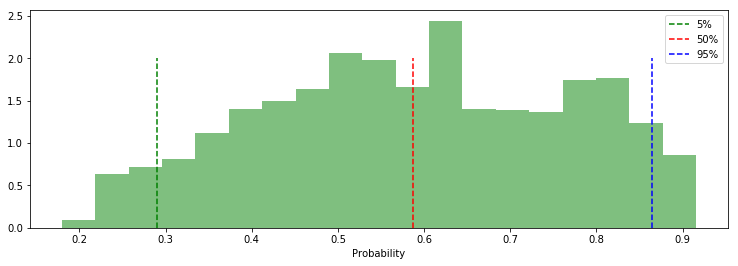

In [248]:
plt.figure(figsize=(12.5,4))
line_height = 2
data = Helpers().averagingModels(np.concatenate(X_list, axis=0), best_models)
x = plt.hist(data, bins='auto', density=True, facecolor='green', alpha=0.5)

plt.vlines(np.percentile(data, 5), 0, line_height, linestyle="--", colors='green', label="5%")
plt.vlines(np.percentile(data, 50), 0, line_height, linestyle="--", colors='red', label="50%")
plt.vlines(np.percentile(data, 95), 0, line_height, linestyle="--", colors='blue', label="95%")
plt.xlabel('Probability')
plt.legend()

In [249]:
rows = []
for model in best_models:
    rows.append(model.get_params())
pd.DataFrame(rows)

,base_score,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_delta_step,max_depth,min_child_weight,missing,n_estimators,n_jobs,nthread,objective,random_state,reg_alpha,reg_lambda,scale_pos_weight,seed,silent,subsample
0,0.575746,gbtree,0.387954,0.660753,0.553191,0.000337,0.025060,1,3,5,None,219,-1,None,binary:logistic,0,0.560734,0.174037,1.039501,None,True,0.888871
1,0.575746,gbtree,0.874458,0.102045,0.260606,0.000443,0.011553,4,6,2,None,227,-1,None,binary:logistic,0,0.076850,1.845689,1.295444,None,True,0.356704
2,0.575746,gbtree,0.281806,0.222457,0.461870,0.000115,0.007174,1,3,3,None,484,-1,None,binary:logistic,0,1.147550,0.951096,1.205888,None,True,0.779345
3,0.575746,gbtree,0.940762,0.631265,0.618323,0.000013,0.004514,3,3,3,None,740,-1,None,binary:logistic,0,2.000000,1.206572,1.152962,None,True,0.477633
4,0.575746,gbtree,0.334713,0.911504,0.456552,0.000762,0.006073,4,5,3,None,279,-1,None,binary:logistic,0,0.033274,0.644852,1.042101,None,True,0.437257
5,0.575746,gbtree,0.237952,0.620382,0.572828,0.000496,0.011567,4,3,4,None,461,-1,None,binary:logistic,0,1.088330,0.723754,0.998464,None,True,0.562688
6,0.575746,gbtree,0.829576,0.578660,0.391912,0.000015,0.004287,0,3,3,None,668,-1,None,binary:logistic,0,1.155879,0.858035,1.187676,None,True,0.292579
7,0.575746,gbtree,0.994466,0.510730,0.362643,0.000162,0.004396,3,5,3,None,522,-1,None,binary:logistic,0,0.365275,0.504231,1.008019,None,True,0.666205
8,0.575746,gbtree,0.692211,0.717131,0.508889,0.003923,0.012477,2,6,3,None,422,-1,None,binary:logistic,0,1.099047,0.731079,1.108509,None,True,0.300359
9,0.575746,gbtree,0.165785,0.661018,0.384102,0.000030,0.006106,2,3,4,None,930,-1,None,binary:logistic,0,1.448285,0.070075,0.902351,None,True,0.799876


## Train on the entire data set

In [134]:
from sklearn.metrics import make_scorer
import numpy as np
from xgboost.sklearn import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from time import time

n_calls = 50
cutoff_score = 80

def afl_loss(y_true, y_pred):
    return -np.sum(1 + np.log2(y_true * y_pred + (1 - y_true) * (1 - y_pred)))
scorer = make_scorer(afl_loss, greater_is_better=False, needs_proba=True)

space = {
    'n_estimators': Integer(200, 1000),
    'max_depth': Integer(3, 6),
    'learning_rate': Real(10 ** -4, 0.1, "log-uniform"),
    'gamma': Real(10 ** -5, 0.1, "log-uniform"),
    'min_child_weight': Integer(1, 5),
    'scale_pos_weight': Real(0, 2, "uniform"),
    'max_delta_step': Integer(0, 5),
    'colsample_bytree': Real(0.1, 1.0, "uniform"),
    'colsample_bylevel': Real(0.1, 1.0, "uniform"),
    'colsample_bynode': Real(0.1, 1.0, "uniform"),
    'subsample': Real(0.1, 1.0, "uniform"),
    'reg_lambda': Real(0.0, 2.0, "uniform"),
    'reg_alpha': Real(0.0, 2.0, "uniform"),
        }

classifier = XGBClassifier(base_score=0.57574568288854, n_jobs=-1)

start = time()
opt = BayesSearchCV(classifier, search_spaces=space, scoring=scorer, cv=5, n_iter=n_calls, n_jobs=-1)

# callback handler
def on_step(iteration):
    score = opt.best_score_
    if score > cutoff_score:
        print('Interrupting!')
        return True

opt.fit(Features().div_cols(X), y, callback=on_step)
model = opt.best_estimator_
print('Entire data set')
print("Bayes CV search took %.2f seconds for %d candidates"
        " parameter settings." % ((time() - start), n_calls))
print("val. score:", opt.best_score_)
print(model)

Entire data set
Bayes CV search took 175.51 seconds for 50 candidates parameter settings.
val. score: 69.9318683472209
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=0.7902171735316731, colsample_bynode=0.1,
       colsample_bytree=0.8640276971742528, gamma=7.686380366726353e-05,
       learning_rate=0.0064770350433801934, max_delta_step=1, max_depth=3,
       min_child_weight=2, missing=None, n_estimators=691, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1.2507819515989722, reg_lambda=1.1543259131376238,
       scale_pos_weight=1.1881929923037489, seed=None, silent=True,
       subsample=0.5925638753350252)


In [135]:
pd.DataFrame(data=model.feature_importances_,
             index=Features().cols() + ['perc','R_mean'], 
             columns=['importance']).sort_values(by=['importance'], ascending=False)

,importance
perc,0.116894
R_mean,0.087577
a_M_mean,0.083945
h_M_mean,0.077551
h_perc,0.077251
a_perc,0.071370
h_R_mean,0.071141
h_A_mean,0.059761
a_A_mean,0.059169
a_R_mean,0.053932


## Scoring

In [173]:
from data_prep.web_scraping import Scrape

games = []
start = 134
for i in range(start,start+6):
    games.append(Scrape(mapping, proxyDict).scrape_game(i))
games

[['Richmond', 'Geelong'],
 ['Carlton', 'Brisbane Lions'],
 ['Gold Coast', 'North Melbourne'],
 ['Adelaide', 'Greater Western Sydney'],
 ['Sydney', 'West Coast'],
 ['Collingwood', 'Melbourne']]

In [174]:
from modelling.scoring import Scoring
scoring = Scoring(mapping, proxyDict).score_data(games)

In [177]:
def modelStats(X, models=[]):
    predictions = np.column_stack([
        model.predict_proba(X)[:,1] for model in models
    ])
    return [np.mean(predictions, axis=1), np.median(predictions, axis=1), np.std(predictions, axis=1), 
            np.max(predictions, axis=1), np.min(predictions, axis=1)]

arr = np.c_[ games, model.predict_proba(scoring)[:,1], modelStats(scoring,best_models)[0],
           modelStats(scoring,best_models)[1],modelStats(scoring,best_models)[2],
            modelStats(scoring,best_models)[3], modelStats(scoring,best_models)[4]] 
pd.DataFrame(arr,columns=['home','away', 'prob','prob_avg', 'prob_med', 'prob_std', 'prob_max', 'prob_min'])

,home,away,prob,prob_avg,prob_med,prob_std,prob_max,prob_min
0,Richmond,Geelong,0.4811169,0.45217898,0.44334984,0.043639734,0.55103093,0.3825254
1,Carlton,Brisbane Lions,0.33926636,0.32121894,0.32068467,0.023796044,0.37785017,0.264363
2,Gold Coast,North Melbourne,0.43252644,0.41852266,0.41301617,0.03078665,0.47429216,0.37489825
3,Adelaide,Greater Western Sydney,0.51456773,0.48225626,0.47851482,0.035697963,0.5430627,0.40916842
4,Sydney,West Coast,0.38334233,0.3615367,0.37145603,0.03903558,0.44436628,0.29683542
5,Collingwood,Melbourne,0.8425907,0.81000286,0.81023425,0.023812907,0.8561661,0.7529866


## Save models

In [137]:
from joblib import dump
dump(model, 'models/model.joblib') 
for i in range(len(best_models)):
    dump(best_models[i], 'models/model'+str(i)+'.joblib') 

## Load models

In [176]:
from joblib import load
model = load('models/model.joblib')
best_models = []
for i in range(15):
    best_models.append(load('models/model'+str(i)+'.joblib'))

## Model Analysis

In [251]:
overall = []
# def afl_loss(y_true, y_pred):
#     return np.sum(1 + np.log2(y_true * y_pred + (1 - y_true) * (1 - y_pred)))
for i in range(len(best_models)):
    season_scores = []
    for rnd in range(1,24):
        df = pd.DataFrame(np.c_[X_list[i],y_list[i]])
        y_new = df[df[0] == rnd][17].values
        x_new = df[df[0] == rnd].drop(17, axis=1).values
        score = Helpers().afl_loss(y_new,best_models[i].predict_proba(Features().div_cols(x_new).values)[:,1])
        season_scores.append(score)
    overall.append(season_scores)

Text(0.5, 1.0, 'Average Cumulative Score')

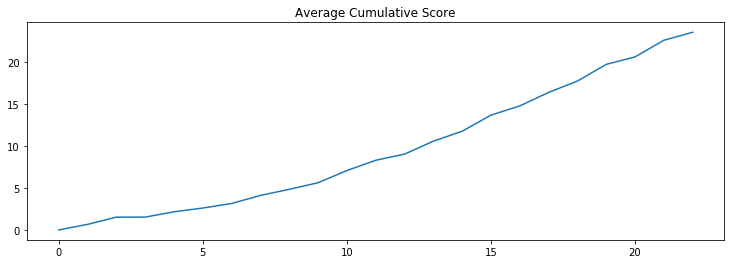

In [252]:
plt.figure(figsize=(12.5,4))
plt.plot(np.cumsum(np.array(np.matrix(np.array(overall)).mean(0)).flatten()))
plt.title('Average Cumulative Score')

In [253]:
data = []
for i in range(15):
    data.append(np.sum(overall[i]))

In [254]:
data_A = np.load('model_A_scores.npy')
data_B = scores.copy()
print(np.sort(data_A))
print(np.sort(data_B))
print(np.mean(data_A))
print(np.mean(data_B))

[14.22454914 15.2045933  15.91451313 17.03966147 18.52530953 19.13225969
 19.46554202 19.53260693 21.53056221 24.01997097 28.2577939  31.80561348
 35.93364907 38.27539488 46.56103408]
[13.67681537 13.9564201  14.29110534 14.61445233 15.79589536 18.68040751
 19.97723103 21.11967257 21.96085657 23.20102671 26.03785728 34.07488506
 35.27261753 38.77271141 42.82167575]
24.361536918612867
23.616908660398206


In [255]:
import pymc3 as pm
# The parameters are the bounds of the Uniform.
with pm.Model() as model:
    alpha_A = pm.Exponential('alpha_A', 1/10)
    beta_A = pm.Uniform('beta_A', lower=0, upper=1)
    alpha_B = pm.Exponential('alpha_B', 1/10)
    beta_B = pm.Uniform('beta_B', lower=0, upper=1)
    
    # Define the deterministic delta function. This is our unknown of interest.
    delta = pm.Deterministic("delta", alpha_A/beta_A - alpha_B/beta_B)
    
    obs_A = pm.Gamma("obs_A", alpha=alpha_A, beta=beta_A, observed=data_A)
    obs_B = pm.Gamma("obs_B", alpha=alpha_B, beta=beta_B, observed=data_B)
    
    step = pm.Metropolis()
    trace = pm.sample(18000, step=step)
    burned_trace = trace[1000:]

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta_B]
>Metropolis: [alpha_B]
>Metropolis: [beta_A]
>Metropolis: [alpha_A]
Sampling 4 chains: 100%|██████████| 74000/74000 [00:16<00:00, 4402.74draws/s]
The number of effective samples is smaller than 10% for some parameters.


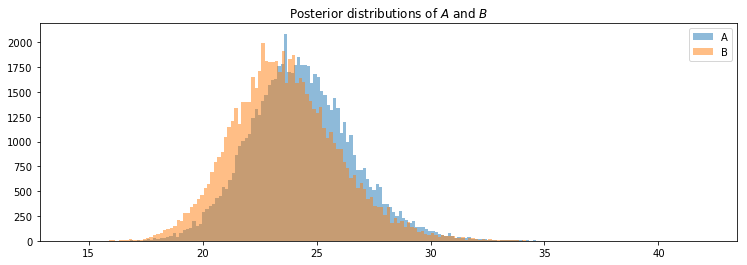

In [256]:
plt.figure(figsize=(12.5,4))
plt.title("Posterior distributions of $A$ and $B$")
plt.hist(burned_trace["alpha_A"]/burned_trace["beta_A"], bins='auto', histtype="stepfilled", alpha=0.5, label="A")
plt.hist(burned_trace["alpha_B"]/burned_trace["beta_B"], bins='auto', histtype="stepfilled", alpha=0.5, label="B")
plt.legend()

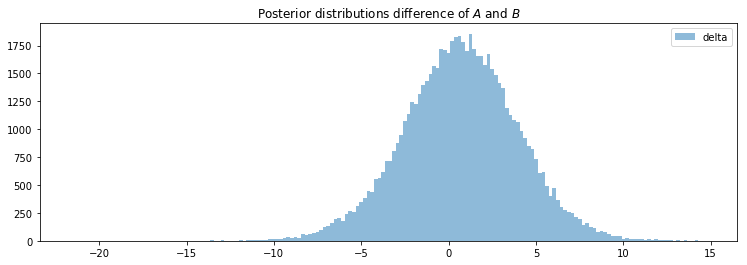

In [257]:
plt.figure(figsize=(12.5,4))
plt.title("Posterior distributions difference of $A$ and $B$")
plt.hist(burned_trace["delta"], bins='auto', histtype="stepfilled", alpha=0.5, label="delta")
plt.legend()

In [258]:
print("Probability model A is WORSE than model B: %.3f" % \
    np.mean(burned_trace["delta"] < 0))

print("Probability model A is BETTER than model B: %.3f" % \
    np.mean(burned_trace["delta"] > 0))

Probability model A is WORSE than model B: 0.410
Probability model A is BETTER than model B: 0.590


## Simulated scores for past seasons

In [77]:
from modelling.scoring import Simulate
Simulate(mapping,proxyDict).generate_past_scores('training-all', best_models, team_df)

NameError: name 'team_df' is not defined

['Richmond', 'West Coast', 'Sydney', 'Adelaide', 'Geelong', 'Greater Western Sydney', 'Melbourne', 'Port Adelaide', 'Collingwood', 'Hawthorn', 'Essendon', 'Western Bulldogs', 'St Kilda', 'North Melbourne', 'Kangaroos', 'Fremantle', 'Brisbane Lions', 'Gold Coast', 'Carlton']


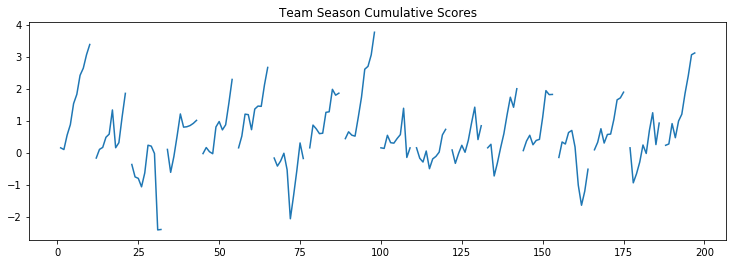

In [97]:
year = 2018
plt.figure(figsize=(12.5,4))
plt.plot(np.load('training-all/scores-'+str(year)+'.npy')[:,0])
plt.title('Team Season Cumulative Scores')
print(teams)

['Richmond', 'West Coast', 'Sydney', 'Adelaide', 'Geelong', 'Greater Western Sydney', 'Melbourne', 'Port Adelaide', 'Collingwood', 'Hawthorn', 'Essendon', 'Western Bulldogs', 'St Kilda', 'North Melbourne', 'Kangaroos', 'Fremantle', 'Brisbane Lions', 'Gold Coast', 'Carlton']


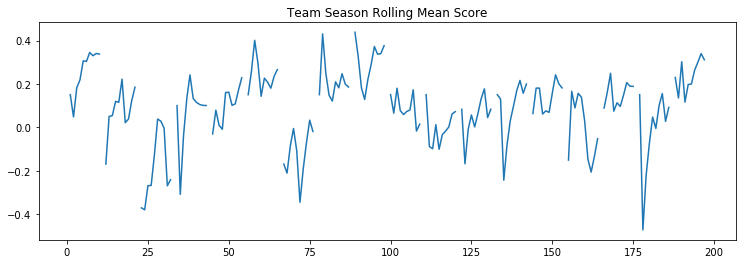

In [98]:
plt.figure(figsize=(12.5,4))
plt.plot(np.load('training-all/scores-'+str(year)+'.npy')[:,2])
plt.title('Team Season Rolling Mean Score')
print(teams)